In [2]:
library(rgdal)
library(readxl)
library(dplyr)
library(tools)
library(lubridate)
library(stringr)

Warning message:
"package 'rgdal' was built under R version 4.0.5"
Loading required package: sp

Warning message:
"package 'sp' was built under R version 4.0.5"
rgdal: version: 1.5-23, (SVN revision 1121)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.2.1, released 2020/12/29
Path to GDAL shared files: C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.2.1, January 1st, 2021, [PJ_VERSION: 721]
Path to PROJ shared files: C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/proj
PROJ CDN enabled: FALSE
Linking to sp version:1.4-5
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.
Overwritten PROJ_LIB was C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/proj

Warning message:
"package 'dplyr' was built under R version 4.0.5"

Attaching package: 'dplyr'


The following object

In [13]:
source("functions.R")

In [1]:
path <- "T:/Data/LTD Data/BikeOnBuses/Monthly/"

In [4]:
data <- read_excel(paste0(path, "LTD Bike Count_2013.xlsx"), 
             col_types = c("text", "date", "numeric", "date", "date", "text", "text", "text", 
                            "text", "numeric", "numeric", "text","numeric", "text", "numeric"))

In [5]:
head(data)

srv,date,block,trip_end,time,route,dir,stop,stop_name,latitude,longitude,bus,odometer,desc,qty
<chr>,<dttm>,<dbl>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
wkd,2013-01-02,1,1899-12-31 06:00:00,1899-12-31 05:23:00,91,O,9249,S/S of Hwy 126 (MP 23.41) E of Mt View Lane,44.13080,-122.6172,151,29.47,bike on rack,1
wkd,2013-01-02,1,1899-12-31 09:25:00,1899-12-31 09:01:00,40,I,816,S/S of Royal W of Ruskin,44.06990,-123.1671,151,8.20,bike on rack,1
wkd,2013-01-02,1,1899-12-31 10:25:00,1899-12-31 10:11:00,36,I,404,S/S of 18th W of McKinley,44.04052,-123.1305,151,23.13,bike on rack,1
wkd,2013-01-02,2,1899-12-31 05:21:00,1899-12-31 05:21:00,11,O,17,N/S of Main E of 62nd Pl,44.04573,-122.9181,1114,9.15,bike on rack,2
wkd,2013-01-02,2,1899-12-31 05:37:00,1899-12-31 05:26:00,11,I,26,N/S of Main E of 50th,44.04582,-122.9434,1114,10.62,bike on rack,1
wkd,2013-01-02,2,1899-12-31 06:37:00,1899-12-31 06:20:00,11,I,26,N/S of Main E of 50th,44.04581,-122.9433,1114,23.75,bike on rack,1


In [6]:
names(data)

[1] "srv"       "date"      "block"     "trip_end"  "time"      "route"    
 [7] "dir"       "stop"      "stop_name" "latitude"  "longitude" "bus"      
[13] "odometer"  "desc"      "qty"

In [9]:
range(data$date)

[1] "2013-01-02 UTC" "2013-01-31 UTC"

In [11]:
MPOBound <- readOGR(dsn = "V:/Data/Transportation", layer="MPO_Bound")

Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
"Discarded ellps WGS 84 in Proj4 definition: +proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"
Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
"Discarded datum WGS_1984 in Proj4 definition: +proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"
Warning message in showSRID(wkt2, "PROJ"):
"Discarded ellps WGS 84 in Proj4 definition: +proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs +type=crs"
Warning message in showSRID(wkt2, "PROJ"):
"Discarded datum World Geodetic System 1984 in Proj4 definition"


OGR data source with driver: ESRI Shapefile 
Source: "V:\Data\Transportation", layer: "MPO_Bound"
with 1 features
It has 3 fields


In [15]:
length(unique(data$stop_name))

[1] 814

In [16]:
dim(data)

[1] 12627    15

In [17]:
length(unique(data$route))

[1] 36

In [22]:
aggdata <- aggregate(x=list(qty = data$qty), by=list(stop_name = data$stop_name), FUN=sum)

In [28]:
locdata <- aggregate(x=list(latitude = data$latitude, longitude= data$longitude), 
                     by=list(stop_name = data$stop_name), FUN=mean)

In [30]:
aggdata <- merge(aggdata, locdata, by='stop_name')

In [32]:
spdf <- df2spdf(aggdata, 'longitude', 'latitude')

Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO", prefer_proj = prefer_proj):
"Discarded ellps WGS 84 in Proj4 definition: +proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs +type=crs"
Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO", prefer_proj = prefer_proj):
"Discarded datum World Geodetic System 1984 in Proj4 definition"


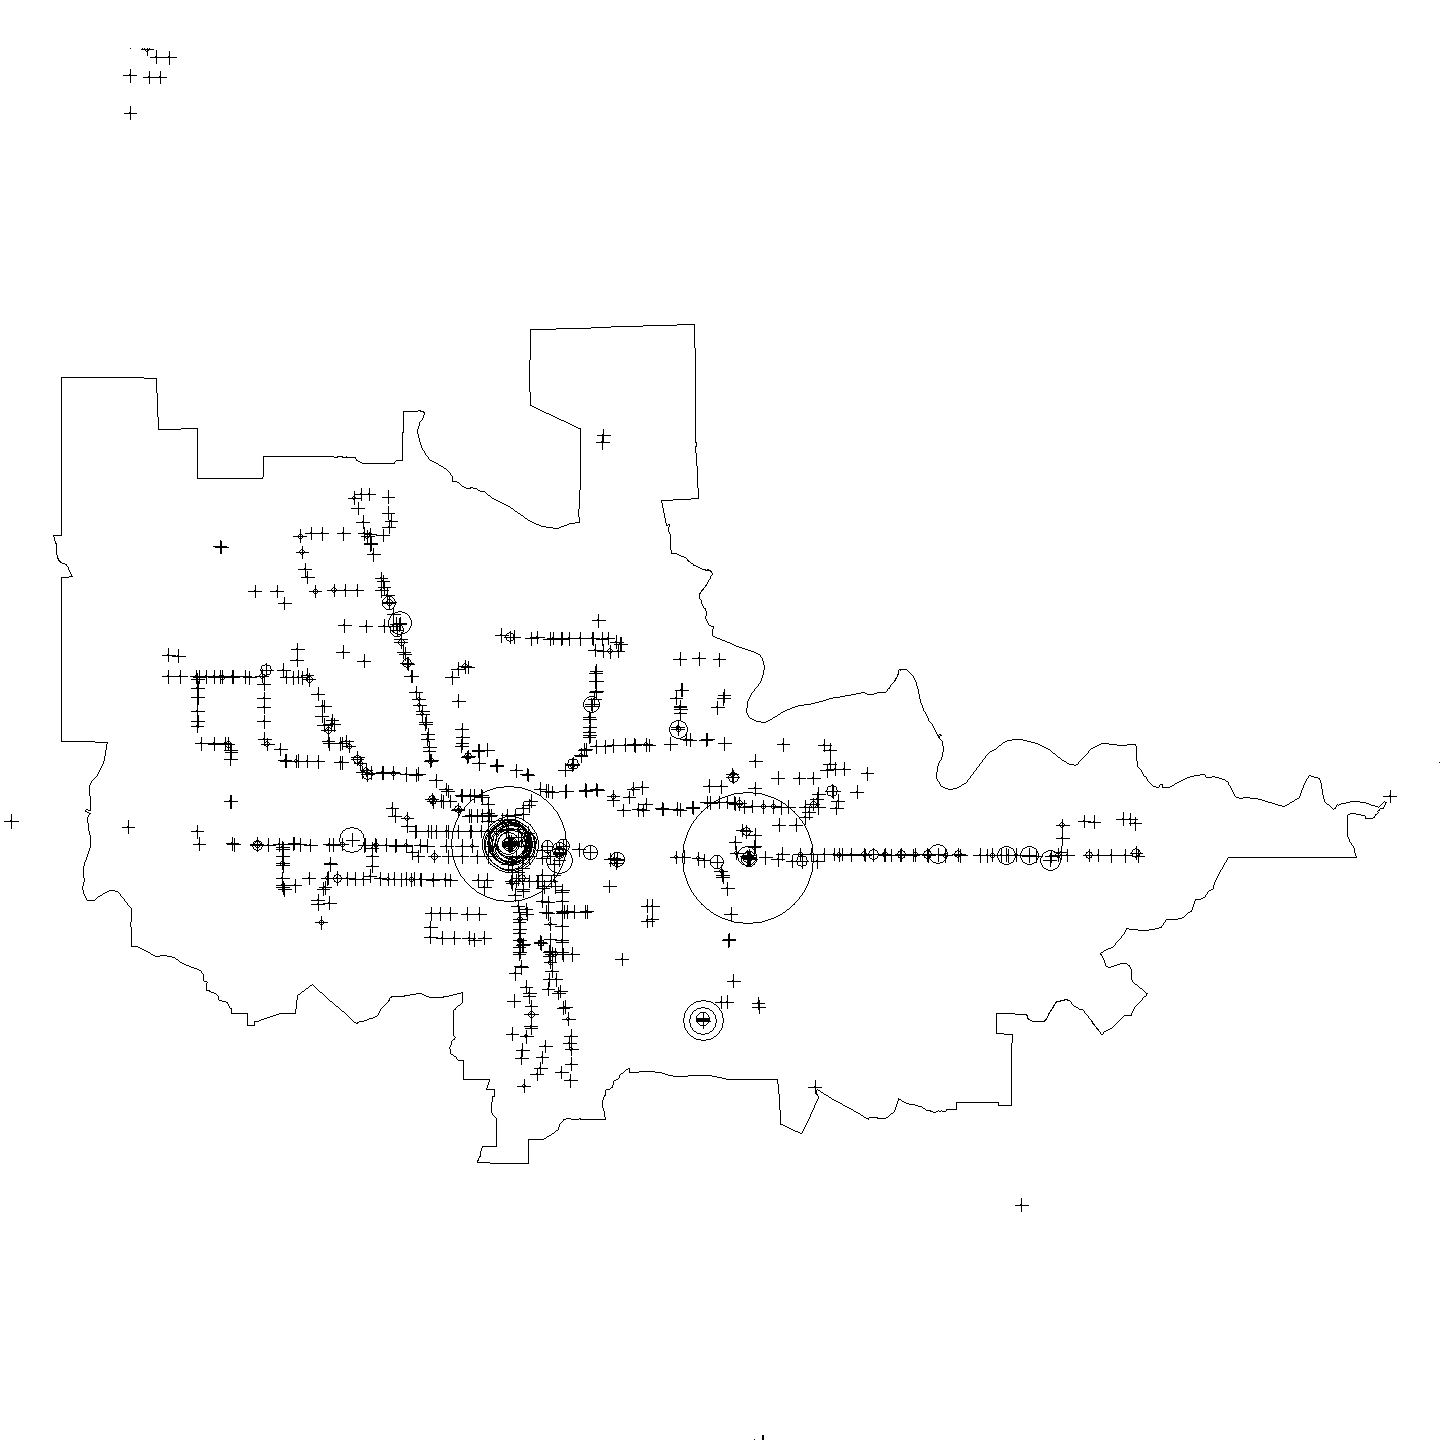

In [34]:
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(1,1),mar=c(0,0,2,0))
plot(MPOBound)
plot(spdf, add=TRUE)
points(spdf$longitude, spdf$latitude, cex=spdf$qty/50)